Data: Medicale cost

kaggle: https://www.kaggle.com/mirichoi0218/insurance/code

# **project goal: prediction of medical cost**

#Libraries & upload data

In [ ]:
# warnings.filterwarnings('ignore')
%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp

#SK learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics and transformation
from scipy.stats import norm, boxcox
from scipy import stats

#Ipython
from IPython.display import Image, display

#Misc
import warnings
from sys import modules
import pydot

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import LabelEncoder

#confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

#EDA

In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1Pmt9xsEhUEZgZXpOtbhAYzcEbVfnE0lu/view?usp=sharing')
df = pd.read_csv(path)
Df=df.copy(deep = True) #for decision tree section
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['charges']=round(df['charges']/1000,2)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.88
1,18,male,33.770,1,no,southeast,1.73
2,28,male,33.000,3,no,southeast,4.45
3,33,male,22.705,0,no,northwest,21.98
4,32,male,28.880,0,no,northwest,3.87


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.nunique()

age          47
sex           2
bmi         548
children      6
smoker        2
region        4
charges     979
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1.64


Since there is only one duplicate, we assume it's a different guy with same parameters

In [ ]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
print(le.classes_)
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
print(le.classes_)
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
print(le.classes_)
df.region = le.transform(df.region)
 
df.head()

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16.88
1,18,1,33.770,1,0,2,1.73
2,28,1,33.000,3,0,2,4.45
3,33,1,22.705,0,0,1,21.98
4,32,1,28.880,0,0,1,3.87


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13.270433
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12.109948
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1.120000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4.742500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9.385000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16.642500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63.770000


In [ ]:
df.bmi.value_counts().sort_index().head(15) # few rows under 18 (normal)

15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
17.400    1
17.480    1
17.670    1
17.765    1
17.800    1
17.860    1
17.955    1
18.050    1
18.300    1
18.335    3
Name: bmi, dtype: int64

For low BMI values there is not enough data representation.

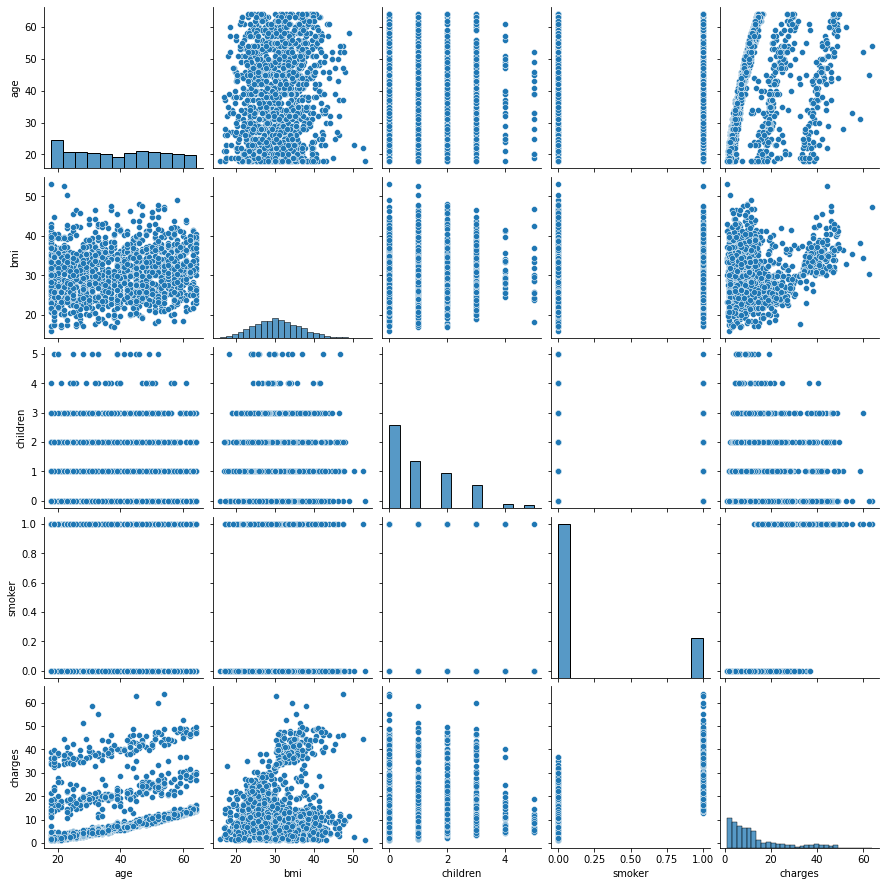

In [ ]:
sns.pairplot(df[['age','bmi','children','smoker','charges']]);

age, smoking status and BMI will influence the most

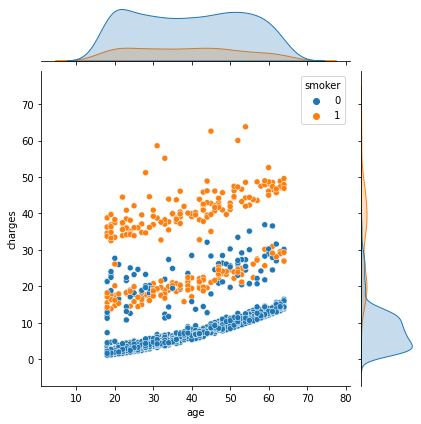

In [ ]:
sns.jointplot(x='age', y='charges', data=df, hue='smoker');

need to seperate for smoker non smoker

In [ ]:
smoker = df[df['smoker']==1]
NonSmoker = df[df['smoker']==0]
smoker.drop(columns='smoker', inplace=True)
NonSmoker.drop(columns = 'smoker', inplace=True)

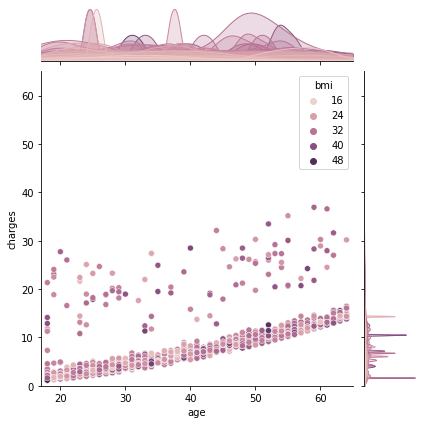

In [ ]:
sns.jointplot(x='age', y='charges', xlim=(17,65),ylim=(0,65), data=NonSmoker, hue='bmi') #For non-smokers, BMI has no meaning

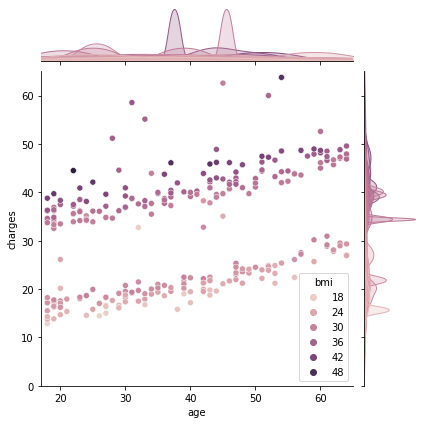

In [ ]:
sns.jointplot(x='age', y='charges', xlim=(17,65),ylim=(0,65), data=smoker, hue='bmi') #For smokers, higher BMI means higher costs.

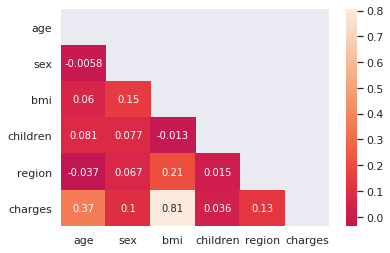

In [ ]:
matrix = np.triu(smoker.corr())
fig = plt.figure()
sns.heatmap(smoker.corr(),annot = True,mask=matrix , cmap= 'rocket', center = 0)
plt.show()

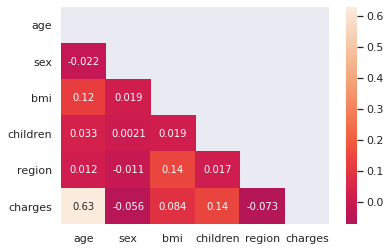

In [ ]:
matrix = np.triu(NonSmoker.corr())
fig = plt.figure()
sns.heatmap(NonSmoker.corr(),annot = True,mask=matrix , cmap= 'rocket', center = 0)
plt.show()

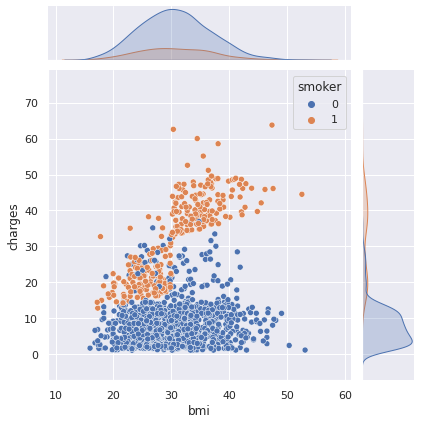

In [ ]:
sns.jointplot(x='bmi', y='charges', data=df, hue='smoker');

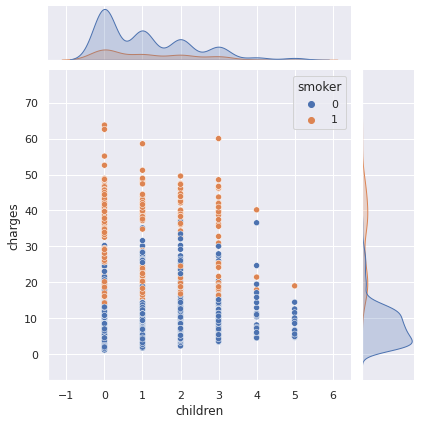

In [ ]:
sns.jointplot(x='children', y='charges', data=df, hue='smoker');

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children.
 
Also people who have children generally smoke less

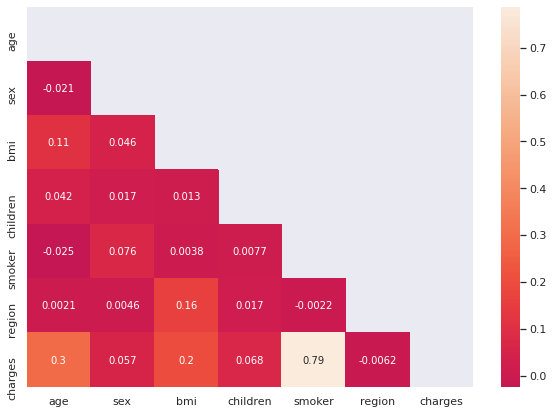

In [ ]:
matrix = np.triu(df.corr())
fig = plt.figure(figsize = [10,7])
sns.heatmap(df.corr(),annot = True,mask=matrix , cmap= 'rocket', center = 0)
plt.show()

In [ ]:
df.corr()#['charges']#.sort_values()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299003
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057290
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198334
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.068006
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787253
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006218
charges,0.299003,0.057290,0.198334,0.068006,0.787253,-0.006218,1.000000


#split the data

In [ ]:
# setting constant parameters
tr_size = 0.8

In [ ]:
#Split the data to Train & Test

# All data
X = df.drop(['charges'], axis=1)
y= df['charges']
X_train, X_test, y_train, y_test = split(X, y, train_size = tr_size, random_state=314159)

# smoker dataframe
x_Smoker = smoker.drop(['charges'], axis=1)
y_Smoker = smoker['charges']
x_Smoker_train, x_Smoker_test, y_Smoker_train, y_Smoker_test = split(x_Smoker, y_Smoker, train_size = tr_size, random_state=314159)

# NonSmoker dataframe
x_NonSmoker = NonSmoker.drop(['charges'], axis=1)
y_NonSmoker = NonSmoker['charges']
x_NonSmoker_train, x_NonSmoker_test, y_NonSmoker_train, y_NonSmoker_test = split(x_NonSmoker, y_NonSmoker, train_size = tr_size, random_state=314159)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16.88
1,18,1,33.770,1,0,2,1.73
2,28,1,33.000,3,0,2,4.45
3,33,1,22.705,0,0,1,21.98
4,32,1,28.880,0,0,1,3.87


# Linear regression (JUDI)

## LR - All the data

In [ ]:
# Fit the model
df_lr = LinearRegression().fit(X_train, y_train)
print("The model intercept is: {}".format(df_lr.intercept_))
print("The model coefficients are: {}".format(df_lr.coef_[0]))

The model intercept is: -11.066858006889271
The model coefficients are: 0.2506315902814059


In [ ]:
# the model formula 
formula = 'charges = ' + f'{df_lr.intercept_:.3f}'
for coef, feature in zip(df_lr.coef_, X_train.columns[:]):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

charges = -11.067+0.251*age+0.104*sex+0.316*bmi+0.507*children+23.783*smoker-0.418*region


In [ ]:
# Apply the model
y_LR_train_pred = df_lr.predict(X_train)
y_LR_train_pred

array([ 9.62469095, -1.09025322, 11.45504582, ..., 13.62736847,
        7.88360308, 10.00679446])

In [ ]:
# RMSE - Assess the model
df_LR_train_rmse = np.sqrt(mean_squared_error(y_train, 
                                        y_LR_train_pred))
print("LR ALL Data RMSE (train) = {:.2f}".format(df_LR_train_rmse))

LR ALL Data RMSE (train) = 6.11


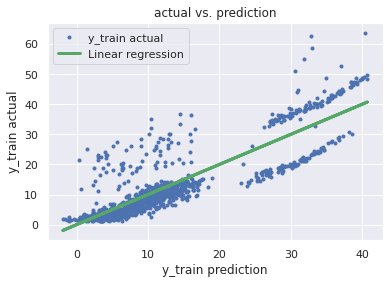

In [ ]:
plt.figure()
plt.plot(y_LR_train_pred, y_train, '.b')
plt.plot(y_LR_train_pred, y_LR_train_pred, 
         linewidth=3, color='g')
plt.xlabel('y_train prediction')
plt.ylabel('y_train actual')
plt.title('actual vs. prediction')
plt.legend(['y_train actual', 'Linear regression'], loc='best')

In [ ]:
# RMSE - Validate the model
y_LR_test_pred = df_lr.predict(X_test)
y_LR_test_pred

array([ 3.78012857e+01,  5.70992292e+00,  2.63579149e+01,  5.60104978e+00,
        5.68701419e+00,  1.04923756e+01,  3.44740423e+01,  1.19908761e+00,
        6.56439179e+00,  1.02596061e+01,  7.17543443e+00,  1.25102919e+01,
        1.28025153e+01,  3.04922157e+00,  1.31969165e+01,  2.79702399e+01,
        6.15853249e+00,  1.04734968e+01,  1.92932251e+00,  8.20540485e+00,
        5.40168897e+00,  3.44399202e+01,  2.65538922e+01,  3.86982835e+01,
        1.01319436e+01,  3.21408723e+01,  1.42207932e+01,  4.99306466e+00,
        9.51563664e+00,  2.73340090e+01,  1.42594350e+01,  1.31889139e+01,
        5.24945191e+00,  1.01854983e+01,  1.30443257e+01,  6.13686861e+00,
        9.58246073e+00,  3.37271115e+01,  4.00655603e+00,  6.76169525e+00,
        1.17744217e+01,  7.62961284e+00,  2.52127157e+01,  3.02490848e+01,
        8.27329859e+00,  9.42930606e+00,  1.01451774e+01,  8.96001064e+00,
        3.39271272e+01,  6.33578465e+00,  7.20284798e+00,  3.34878846e+01,
        1.27321500e+01,  

In [ ]:
df_LR_test_rmse = np.sqrt(mean_squared_error(y_test, 
                         y_LR_test_pred))
print("LR ALL Data RMSE (test) = {:.2f}".format(df_LR_test_rmse))

LR ALL Data RMSE (test) = 5.81


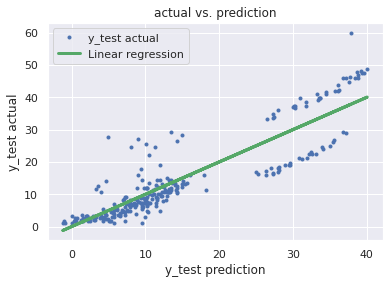

In [ ]:
plt.figure()
plt.plot(y_LR_test_pred, y_test, '.b')
plt.plot(y_LR_test_pred, y_LR_test_pred, 
         linewidth=3, color='g')
plt.xlabel('y_test prediction')
plt.ylabel('y_test actual')
plt.title('actual vs. prediction')
plt.legend(['y_test actual', 'Linear regression'], loc='best')

In [ ]:
df['LR - pred'] = df_lr.predict(X)
df.head()

,age,sex,bmi,children,smoker,region,charges,LR - pred
0,19,0,27.900,0,1,3,16.88,25.047372
1,18,1,33.770,1,0,2,1.73,3.899484
2,28,1,33.000,3,0,2,4.45,7.175434
3,33,1,22.705,0,0,1,21.98,4.071030
4,32,1,28.880,0,0,1,3.87,5.773283


## LR - Smokers only

In [ ]:
# Fit the model
Smoker_lr = LinearRegression().fit(x_Smoker_train, y_Smoker_train)

In [ ]:
print("The model intercept is: {}".format(Smoker_lr.intercept_))
print("The model coefficients are: {}".format(Smoker_lr.coef_[0]))

The model intercept is: -21.396759687257415
The model coefficients are: 0.2605435657496782


In [ ]:
# the model formula 
formula = 'charges = ' + f'{Smoker_lr.intercept_:.3f}'
for coef, feature in zip(Smoker_lr.coef_, x_Smoker_train.columns[:]):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

charges = -21.397+0.261*age-0.852*sex+1.439*bmi+0.243*children-0.534*region


In [ ]:
# Apply the model
y_smoker_LR_train_pred = Smoker_lr.predict(x_Smoker_train)
y_smoker_LR_train_pred

array([24.01285937, 30.76830424, 38.86393545, 24.78161198, 22.11261383,
       25.55315882, 32.38782861, 26.59539632, 19.1477544 , 13.83114138,
       43.02838608, 30.47757586, 22.23802696, 36.86471123, 52.21086162,
       44.53819252, 25.74879254, 30.5958262 , 22.44675523, 59.85007127,
       37.01172269, 17.61166378, 29.58063876, 41.73300462, 42.5345517 ,
       35.33140014, 27.0059066 , 29.84122813, 24.34087795, 20.97245411,
       27.55951753, 38.56166941, 31.20035747, 49.23695878, 39.21805364,
       36.9753324 , 25.67820824, 32.55057773, 35.62356006, 27.98880292,
       35.52753701, 51.51835161, 36.33791492, 36.9652575 , 17.89792161,
       19.81826188, 33.8213174 , 27.07894416, 25.32323759, 33.39510032,
       20.66642831,  7.81613156, 25.92886934, 41.94029028, 41.10805491,
       50.35980119, 55.24232002, 27.67043997, 40.21700471, 30.71375665,
       46.236896  , 18.26365793, 26.90761221, 37.81178013, 27.30338066,
       28.11549343, 31.19276928, 44.19560705, 45.95384946, 37.52

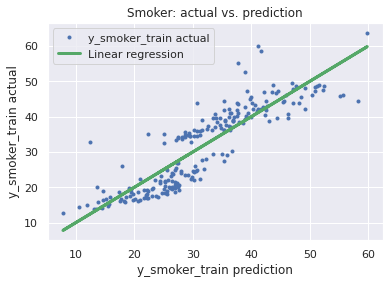

In [ ]:
plt.figure()
plt.plot(y_smoker_LR_train_pred, y_Smoker_train, '.b')
plt.plot(y_smoker_LR_train_pred, y_smoker_LR_train_pred, 
         linewidth=3, color='g')
plt.xlabel('y_smoker_train prediction')
plt.ylabel('y_smoker_train actual')
plt.title('Smoker: actual vs. prediction')
plt.legend(['y_smoker_train actual', 'Linear regression'], loc='best')

In [ ]:
# RMSE - Assess the model
smoker_LR_train_rmse = np.sqrt(mean_squared_error(y_smoker_LR_train_pred, 
                                        y_Smoker_train))
print("Smokers only RMSE (train) = {:.2f}".format(smoker_LR_train_rmse))

Smokers only RMSE (train) = 5.46


In [ ]:
# Validate the model
y_smoker_LR_test_pred = Smoker_lr.predict(x_Smoker_test)
y_smoker_LR_test_pred

array([47.11528632, 27.36944779, 27.97290245, 22.38494076, 20.42867862,
       24.59162149, 29.78814794, 37.22156089, 24.59898073, 40.48340234,
       27.6663866 , 36.08420295, 23.99974739, 33.12598479, 22.68840623,
       42.29308032, 52.66440637, 36.98541626, 45.66727706, 38.5446118 ,
       28.11538025, 38.70727814, 27.49207584, 34.31092231, 20.57662262,
       20.74939285, 33.65332734, 34.10505552, 33.47060436, 18.67969541,
       19.58806706, 42.5733842 , 39.89914219, 40.73086865, 33.32052446,
       36.81126652, 43.15942501, 31.33671739, 26.68321607, 45.6007844 ,
       26.23262984, 24.81329158, 26.98668154, 42.70196219, 40.25304298,
       37.22746924, 27.12502611, 25.39613218, 35.84840459, 34.43931683,
       32.10976445, 39.03518483, 46.01111011, 27.28794873, 35.64372778])

In [ ]:
# RMSE - test
smoker_LR_test_rmse = np.sqrt(mean_squared_error(y_smoker_LR_test_pred, 
                                        y_Smoker_test))
print("Smokers only RMSE (test) = {:.2f}".format(smoker_LR_test_rmse))

Smokers only RMSE (test) = 6.69


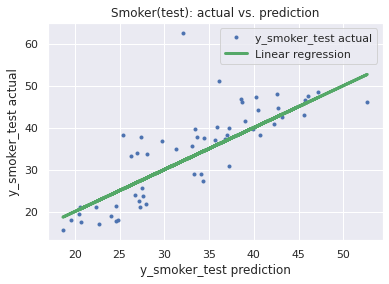

In [ ]:
plt.figure()
plt.plot(y_smoker_LR_test_pred, y_Smoker_test, '.b')
plt.plot(y_smoker_LR_test_pred, y_smoker_LR_test_pred, 
         linewidth=3, color='g')
plt.xlabel('y_smoker_test prediction')
plt.ylabel('y_smoker_test actual')
plt.title('Smoker(test): actual vs. prediction')
plt.legend(['y_smoker_test actual', 'Linear regression'], loc='best')

## LR - Non Smokers 

The model intercept is: -1.9206636821145597
The model coefficients are: 0.26045896887977693
charges = -1.921+0.260*age-0.513*sex+0.012*bmi+0.660*children-0.477*region
Figure(432x288)
Non Smokers only RMSE (train) = 4.59
Non Smokers only RMSE (test) = 4.53
Figure(432x288)


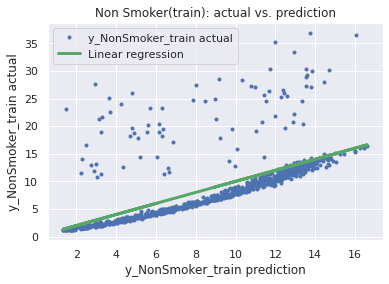

<Figure size 432x288 with 0 Axes>

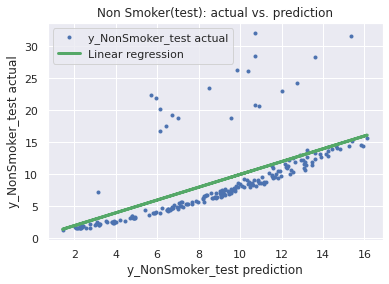

<Figure size 432x288 with 0 Axes>

In [ ]:
# Fit the model
NonSmoker_lr = LinearRegression().fit(x_NonSmoker_train, y_NonSmoker_train)

print("The model intercept is: {}".format(NonSmoker_lr.intercept_))
print("The model coefficients are: {}".format(NonSmoker_lr.coef_[0]))

# the model formula 
formulaNonSmoker = 'charges = ' + f'{NonSmoker_lr.intercept_:.3f}'
for coef, feature in zip(NonSmoker_lr.coef_, x_NonSmoker_train.columns[:]):
    formulaNonSmoker += f'{coef:+.3f}*{feature}'
print(formulaNonSmoker)

# Apply the model
y_NonSmoker_LR_train_pred = NonSmoker_lr.predict(x_NonSmoker_train)

plt.figure()
plt.plot(y_NonSmoker_LR_train_pred, y_NonSmoker_train, '.b')
plt.plot(y_NonSmoker_LR_train_pred, y_NonSmoker_LR_train_pred, 
         linewidth=3, color='g')
plt.xlabel('y_NonSmoker_train prediction')
plt.ylabel('y_NonSmoker_train actual')
plt.title('Non Smoker(train): actual vs. prediction')
plt.legend(['y_NonSmoker_train actual', 'Linear regression'], loc='best')
print(plt.figure())

# RMSE - Assess the model
NonSmoker_LR_train_rmse = np.sqrt(mean_squared_error(y_NonSmoker_LR_train_pred, 
                                        y_NonSmoker_train))
print("Non Smokers only RMSE (train) = {:.2f}".format(NonSmoker_LR_train_rmse))

# Validate the model
y_NonSmoker_LR_test_pred = NonSmoker_lr.predict(x_NonSmoker_test)

# RMSE - Test
NonSmoker_LR_test_rmse = np.sqrt(mean_squared_error(y_NonSmoker_LR_test_pred, 
                                        y_NonSmoker_test))
print("Non Smokers only RMSE (test) = {:.2f}".format(NonSmoker_LR_test_rmse))


# plot
plt.figure()
plt.plot(y_NonSmoker_LR_test_pred, y_NonSmoker_test, '.b')
plt.plot(y_NonSmoker_LR_test_pred, y_NonSmoker_LR_test_pred, 
         linewidth=3, color='g')
plt.xlabel('y_NonSmoker_test prediction')
plt.ylabel('y_NonSmoker_test actual')
plt.title('Non Smoker(test): actual vs. prediction')
plt.legend(['y_NonSmoker_test actual', 'Linear regression'], loc='best')
print(plt.figure())

In [ ]:
NonSmoker['LR_pred'] = NonSmoker_lr.predict(x_NonSmoker)
NonSmoker.head()

,age,sex,bmi,children,region,charges,LR_pred
1,18,1,33.770,1,2,1.73,2.375310
2,28,1,33.000,3,2,4.45,6.290368
3,33,1,22.705,0,1,21.98,5.963402
4,32,1,28.880,0,1,3.87,5.778824
5,31,0,25.740,0,2,3.76,5.515580


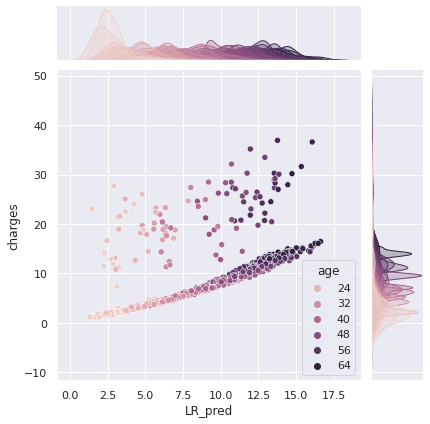

In [ ]:
sns.jointplot(x='LR_pred', y='charges', data=NonSmoker, hue='age');

No commonality found regarding outlayers.

## LR - using dummies

In [ ]:
df_dummies = pd.get_dummies(df, columns=['smoker'])
df_dummies.head()

,age,sex,bmi,children,region,charges,LR - pred,smoker_0,smoker_1
0,19,0,27.900,0,3,16.88,25.047372,0,1
1,18,1,33.770,1,2,1.73,3.899484,1,0
2,28,1,33.000,3,2,4.45,7.175434,1,0
3,33,1,22.705,0,1,21.98,4.071030,1,0
4,32,1,28.880,0,1,3.87,5.773283,1,0


In [ ]:
# split the data
X_dum = df_dummies.drop(['LR - pred','charges'], axis=1)
y_dum= df['charges']
X_dum_train, X_dum_test, y_dum_train, y_dum_test = split(X_dum, y_dum, train_size = tr_size, random_state=314159)


In [ ]:
# Fit the model
df_dum_lr = LinearRegression().fit(X_dum_train, y_dum_train)
print("The model intercept is: {}".format(df_dum_lr.intercept_))
print("The model coefficients are: {}".format(df_dum_lr.coef_[0]))

The model intercept is: 0.8245187347694269
The model coefficients are: 0.25063159028140597


In [ ]:
# the model formula 
formula_dum = 'charges = ' + f'{df_dum_lr.intercept_:.3f}'
for coef, feature in zip(df_dum_lr.coef_, X_dum_train.columns[:]):
    formula_dum += f'{coef:+.3f}*{feature}'
print(formula_dum)

charges = 0.825+0.251*age+0.104*sex+0.316*bmi+0.507*children-0.418*region-11.891*smoker_0+11.891*smoker_1


In [ ]:
# Apply the model
y_LR_dum_train_pred = df_dum_lr.predict(X_dum_train)
y_LR_dum_train_pred

array([ 9.62469095, -1.09025322, 11.45504582, ..., 13.62736847,
        7.88360308, 10.00679446])

In [ ]:
# RMSE - Assess the model
df_LR_dum_train_rmse = np.sqrt(mean_squared_error(y_dum_train, 
                                        y_LR_dum_train_pred))
print("LR Dummies RMSE (train) = {:.2f}".format(df_LR_dum_train_rmse))

LR Dummies RMSE (train) = 6.11


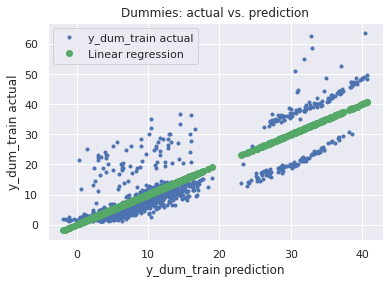

In [ ]:
plt.figure()
plt.plot(y_LR_dum_train_pred, y_dum_train, '.b')
plt.plot(y_LR_dum_train_pred, y_LR_dum_train_pred,'om', color='g')
# plt.plot(y_LR_train_pred, y_LR_train_pred, linewidth=1, color='r') # Comparing to ALL DATA prediction
plt.xlabel('y_dum_train prediction')
plt.ylabel('y_dum_train actual')
plt.title('Dummies: actual vs. prediction')
plt.legend(['y_dum_train actual', 'Linear regression'], loc='best')

In [ ]:
# Validate the model
y_LR_dum_test_pred = df_dum_lr.predict(X_dum_test)

In [ ]:
# RMSE - Test
df_LR_dum_test_rmse = np.sqrt(mean_squared_error(y_dum_test, 
                                        y_LR_dum_test_pred))
print("LR Dummies RMSE (test) = {:.2f}".format(df_LR_dum_test_rmse))


LR Dummies RMSE (test) = 5.81


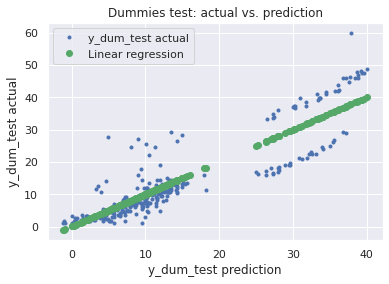

In [ ]:
plt.figure()
plt.plot(y_LR_dum_test_pred, y_dum_test, '.b')
plt.plot(y_LR_dum_test_pred, y_LR_dum_test_pred,'om', color='g')
plt.xlabel('y_dum_test prediction')
plt.ylabel('y_dum_test actual')
plt.title('Dummies test: actual vs. prediction')
plt.legend(['y_dum_test actual', 'Linear regression'], loc='best')

In [ ]:
df_dummies['LR_dum_pred'] = df_dum_lr.predict(X_dum)
df_dummies.head()

,age,sex,bmi,children,region,charges,LR - pred,smoker_0,smoker_1,LR_dum_pred
0,19,0,27.900,0,3,16.88,25.047372,0,1,25.047372
1,18,1,33.770,1,2,1.73,3.899484,1,0,3.899484
2,28,1,33.000,3,2,4.45,7.175434,1,0,7.175434
3,33,1,22.705,0,1,21.98,4.071030,1,0,4.071030
4,32,1,28.880,0,1,3.87,5.773283,1,0,5.773283


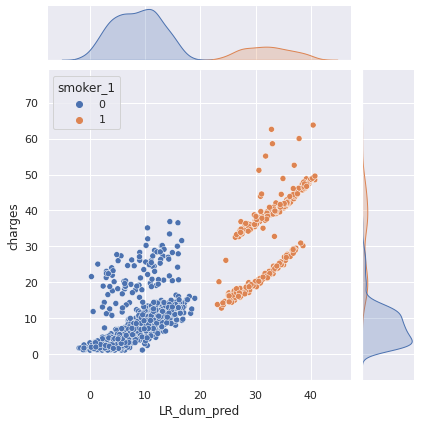

In [ ]:
sns.jointplot(x='LR_dum_pred', y='charges', data=df_dummies, hue='smoker_1');

#Desision Tree

In [ ]:
#Decision Tree model
df_dt = DecisionTreeRegressor(max_leaf_nodes=22, splitter='best') 
df_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=22,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

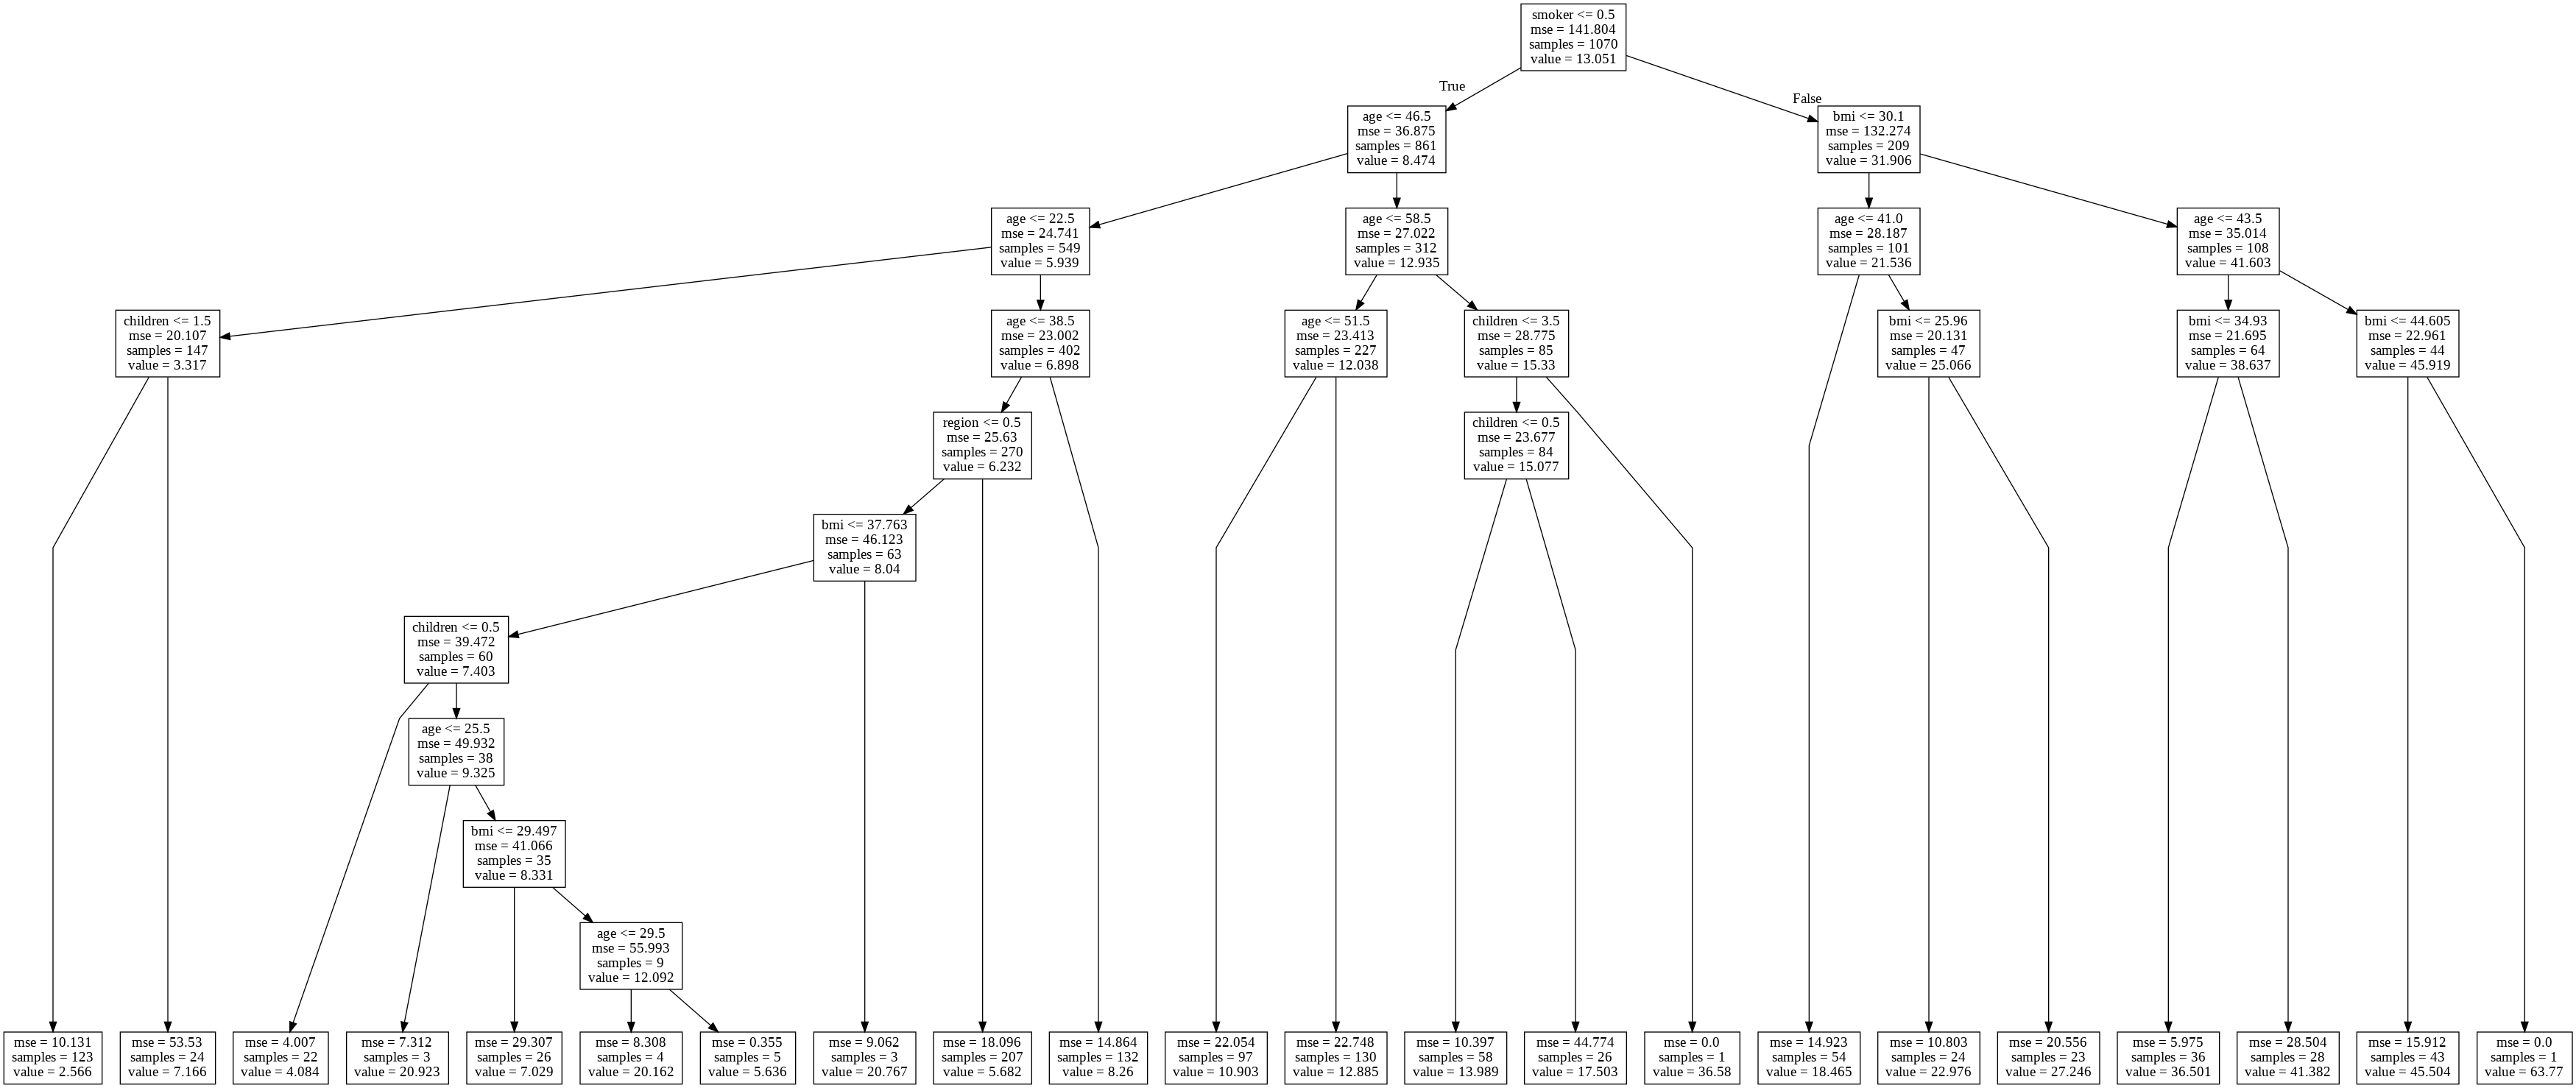

In [ ]:
dot_data = StringIO()     
export_graphviz(df_dt, out_file=dot_data, feature_names=X_train.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=750) 

In [ ]:
#RMSE TRAIN
y_dt_train_pred = df_dt.predict(X_train)
DT_train_rmse = np.sqrt(mean_squared_error(y_train, y_dt_train_pred))
print(f"RMSE (Tree-train)= {DT_train_rmse:.2f}")  

RMSE (Tree-train)= 4.24


In [ ]:
#RMSE TEST
y_dt_test_pred = df_dt.predict(X_test)
DT_test_rmse = np.sqrt(mean_squared_error(y_test, y_dt_test_pred))
print(f"RMSE (Tree- test)= {DT_test_rmse:.2f}")  

RMSE (Tree- test)= 4.31


In [ ]:
#Feature importance- Train
for feature, importance in zip(X_train.columns, df_dt.feature_importances_):
    print(f'{feature:12}: {importance}')

age         : 0.11893312408806282
sex         : 0.0
bmi         : 0.17072465149668153
children    : 0.011220687003120955
smoker      : 0.6970950125766626
region      : 0.002026524835472116


what happens to the train error and test error when we tune the hyper-parameter called max_leaf_nodes

In [ ]:
complexity = range(2, 201 , 1)
scores = pd.DataFrame(index=complexity, columns=['train', 'test'])

for leafs in complexity:
    df_dt = DecisionTreeRegressor(max_leaf_nodes=leafs).fit(X_train, y_train)
    
    sub_y_train_pred = df_dt.predict(X_train)
    scores.loc[leafs, 'train'] = mse(sub_y_train_pred, y_train ) ** 0.5 
    
    sub_y_test_pred = df_dt.predict(X_test)
    scores.loc[leafs, 'test'] = mse(sub_y_test_pred, y_test)** 0.5

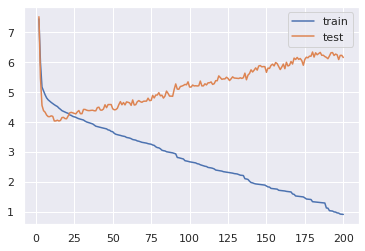

In [ ]:
scores.plot()

In [ ]:
vMaxLeaf  = range(2, 51 , 1)
vMinSampleLeaf = np.linspace(0.00001, 0.15, num=100)
mTrainRmse = np.zeros((len(vMaxLeaf), len(vMinSampleLeaf)))
mTestRmse = np.zeros((len(vMaxLeaf), len(vMinSampleLeaf)))

for i, maxLeaf in enumerate(vMaxLeaf):
  for j, minSampleLeaf in enumerate(vMinSampleLeaf):
    dtModel = DecisionTreeRegressor(max_leaf_nodes=maxLeaf, min_samples_leaf=minSampleLeaf, random_state=1)
    dtModel.fit(X_train,y_train)
    mTrainRmse[i,j] = mse(dtModel.predict(X_train), y_train, squared=False)
    mTestRmse[i,j] = mse(dtModel.predict(X_test), y_test, squared=False)

minVal = min(np.amin(mTrainRmse), np.amin(mTestRmse))
maxVal = max(np.amin(mTrainRmse), np.amin(mTestRmse))

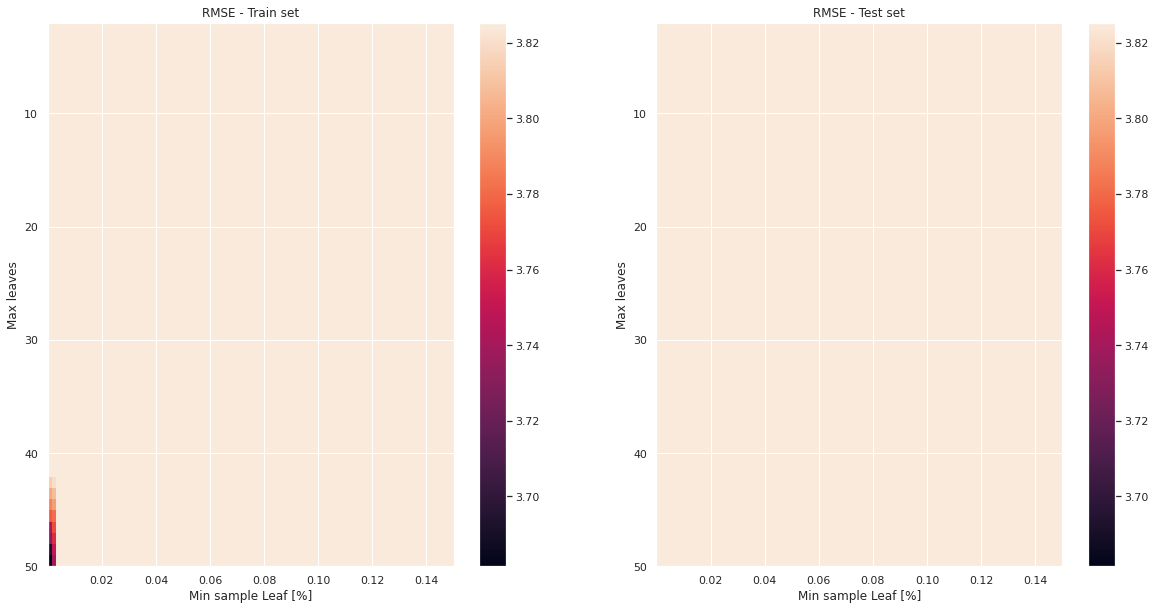

In [ ]:
hF , (hA1, hA2) = plt.subplots(1,2, figsize=(20,10))
hImgObj = hA1.imshow(mTrainRmse, vmin=minVal, vmax= maxVal, extent=(vMinSampleLeaf[0], vMinSampleLeaf[-1],vMaxLeaf[-1], vMaxLeaf[0]))
hA1.set_xlabel('Min sample Leaf [%]')
hA1.set_ylabel('Max leaves')
hA1.set_title('RMSE - Train set')
hA1.set_aspect('auto')
hF.colorbar(hImgObj, ax=hA1)
hImgObj = hA2.imshow(mTestRmse, vmin=minVal, vmax= maxVal, extent=(vMinSampleLeaf[0], vMinSampleLeaf[-1],vMaxLeaf[-1], vMaxLeaf[0]))
hA2.set_xlabel('Min sample Leaf [%]')
hA2.set_ylabel('Max leaves')
hA2.set_title('RMSE - Test set')
hA2.set_aspect('auto')
hF.colorbar(hImgObj, ax=hA2)

# KNN

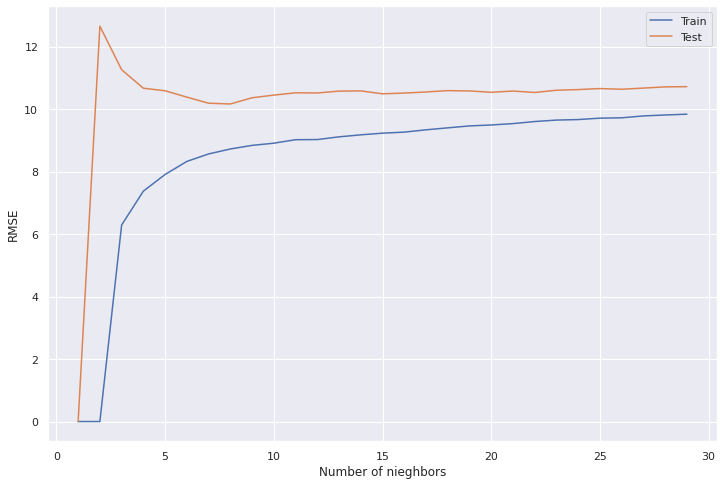

In [ ]:
NumNeighbors =range(1,30)
vRmse = np.zeros(len(NumNeighbors)) # create array of zeros
vRmsetest = np.zeros(len(NumNeighbors)) # create array of zeros

for i in range(1,len(NumNeighbors)):
  Vmodel = KNeighborsRegressor(n_neighbors=i,p=1).fit(X_train, y_train) 
  vRmse[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_train), y_train)) 
  vRmsetest[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_test), y_test))

hF , hA = plt.subplots(figsize=(12,8))
hA.plot(NumNeighbors,vRmse,label='Train')
hA.plot(NumNeighbors,vRmsetest,label='Test')
hA.set_xlabel('Number of nieghbors')
hA.set_ylabel('RMSE')
hA.legend()

In [ ]:
# Fit the model
knn_df = KNeighborsRegressor(n_neighbors=7,p=1)
knn_df.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='uniform')

In [ ]:
# prediction
y_knn_pred_train = knn_df.predict(X_train)
y_knn_pred_test = knn_df.predict(X_test)

In [ ]:
#RMSE TRAIN
df_rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_knn_pred_train))
print(f"KNN RMSE (train)= {df_rmse_train_knn:.2f}")  

#RMSE TEST
df_rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_knn_pred_test))
print(f"KNN RMSE (test)= {df_rmse_test_knn:.2f}") 

print(df_rmse_test_knn-df_rmse_train_knn)

KNN RMSE (train)= 8.72
KNN RMSE (test)= 10.16
1.4405121912132337


In [ ]:
knn_df = df.copy(deep = True)
knn_df.drop(columns=['LR - pred'],inplace= True)
X_knn = knn_df.drop(['charges'], axis=1)
y_knn= knn_df['charges']
X_train_s, X_test_s, y_train_s, y_test_s = split(X_knn, y_knn, train_size = tr_size, random_state=314159)


In [ ]:
# using StandardScalar
scaler = StandardScaler()
scaler.fit(X_knn)
X_train_s = scaler.transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

knn_df = KNeighborsRegressor(n_neighbors=7,p=1)
knn_df.fit(X_train_s, y_train_s)

# prediction
y_pred_train = knn_df.predict(X_train_s)
y_pred_test = knn_df.predict(X_test_s)

#RMSE TRAIN
df_s_rmse_train_knn = np.sqrt(mean_squared_error(y_train_s, y_pred_train))
print(f"Knn Standard Scalar RMSE (train)= {df_s_rmse_train_knn:.2f}")  

#RMSE TEST
df_s_rmse_test_knn = np.sqrt(mean_squared_error(y_test_s, y_pred_test))
print(f"Knn Standard Scalar RMSE (test)= {df_s_rmse_test_knn:.2f}") 

Knn Standard Scalar RMSE (train)= 5.37
Knn Standard Scalar RMSE (test)= 6.12


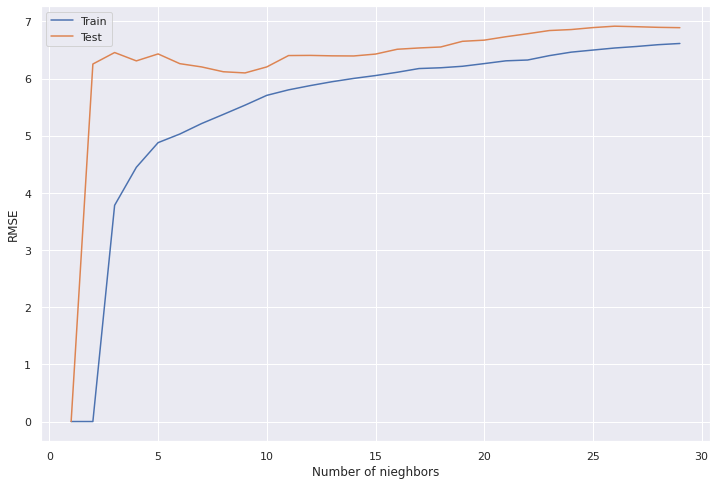

In [ ]:
NumNeighbors =range(1,30)
vRmse = np.zeros(len(NumNeighbors)) # create array of zeros
vRmsetest = np.zeros(len(NumNeighbors)) # create array of zeros

for i in range(1,len(NumNeighbors)):
  Vmodel = KNeighborsRegressor(n_neighbors=i,p=1).fit(X_train_s, y_train) 
  vRmse[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_train_s), y_train)) 
  vRmsetest[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_test_s), y_test))

hF , hA = plt.subplots(figsize=(12,8))
hA.plot(NumNeighbors,vRmse,label='Train')
hA.plot(NumNeighbors,vRmsetest,label='Test')
hA.set_xlabel('Number of nieghbors')
hA.set_ylabel('RMSE')
hA.legend()

## transforming the data

The data before trasnformation

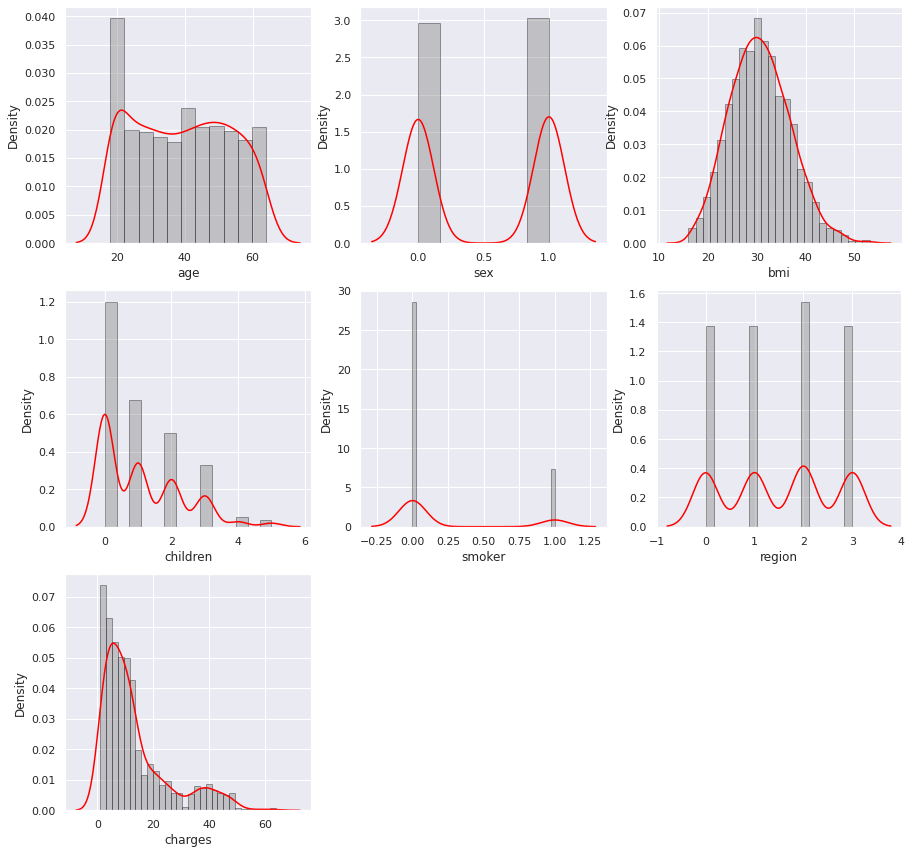

In [ ]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

NameError: ignored

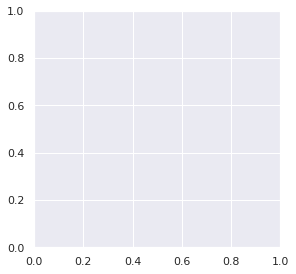

In [ ]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['age', 'sex', 'bmi', 'children', 'region', 'charges']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(NonSmoker[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

In [ ]:
# copying the data
df_t = df.copy(deep = True)

Before Correcting
Mu before correcting AGE : 39.20702541106129, Sigma before correcting AGE : 14.044709038954522


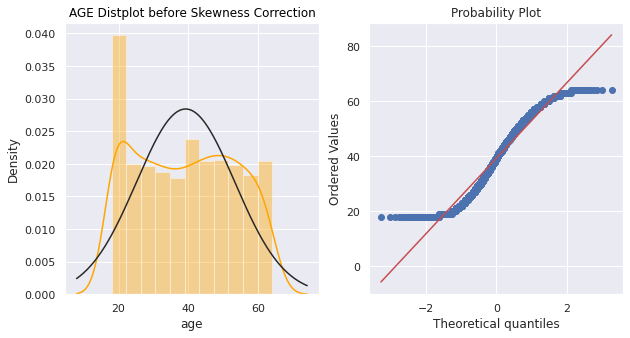

After Correcting
Mu after correcting AGE : 39.20702541106129, Sigma after correcting AGE : 14.044709038954522


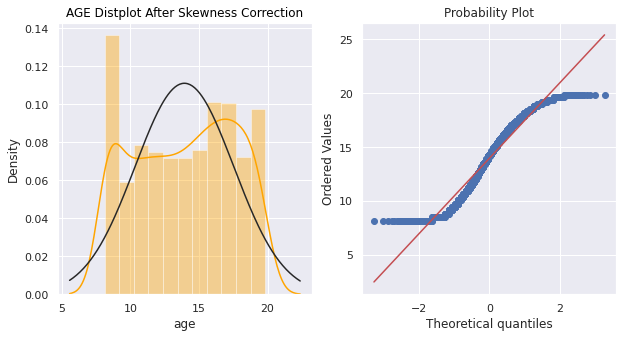

Before Correcting
Mu before correcting BMI : 30.66339686098655, Sigma before correcting BMI : 6.0959076415894256


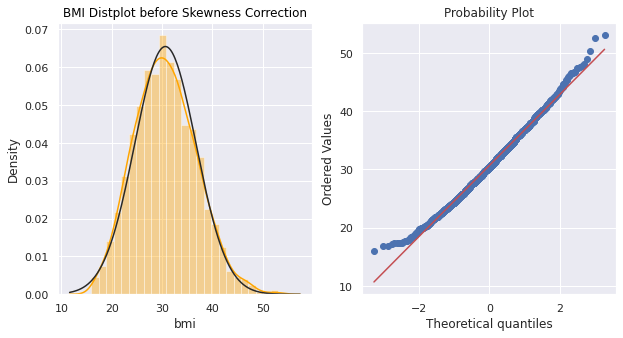

After Correcting
Mu after correcting BMI : 30.66339686098655, Sigma after correcting BMI : 6.0959076415894256


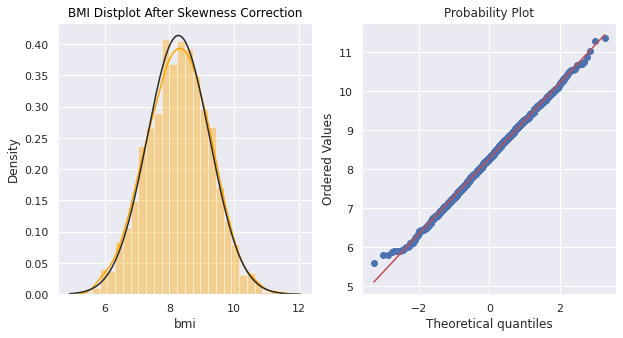

In [ ]:
# Box Cox transformation
def skewnessCorrector(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(df_t[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df_t[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df_t[columnName], plot=plt)
    plt.show();
    df_t[columnName], lam_fixed_acidity = boxcox(df_t[columnName])
    print('''After Correcting''')
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df_t[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df_t[columnName], plot = plt)
    plt.show();


skewColumnList = [
    'age','bmi'
]
for columns in skewColumnList:
    skewnessCorrector(columns)

In [ ]:
X_t = df_t.drop(['charges'], axis=1)
y_t = df_t['charges']
X_t_train, X_t_test, y_t_train, y_t_test = split(X_t, y_t, test_size=0.2, random_state=314159)

In [ ]:
knn_model_t = KNeighborsRegressor(n_neighbors=7,p=1)
knn_model_t.fit(X_t_train, y_t_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='uniform')

In [ ]:
# prediction
y_t_pred_train = knn_model_t.predict(X_t_train)
y_t_pred_test = knn_model_t.predict(X_t_test)


#RMSE TRAIN
df_t_rmse_train_knn = np.sqrt(mean_squared_error(y_t_train, y_t_pred_train))
print(f"RMSE (knn-train)= {df_t_rmse_train_knn:.2f}")  

#RMSE TEST
df_t_rmse_test_knn = np.sqrt(mean_squared_error(y_t_test, y_t_pred_test))
print(f"RMSE (Tree- test)= {df_t_rmse_test_knn:.2f}") 

RMSE (knn-train)= 4.58
RMSE (Tree- test)= 4.57


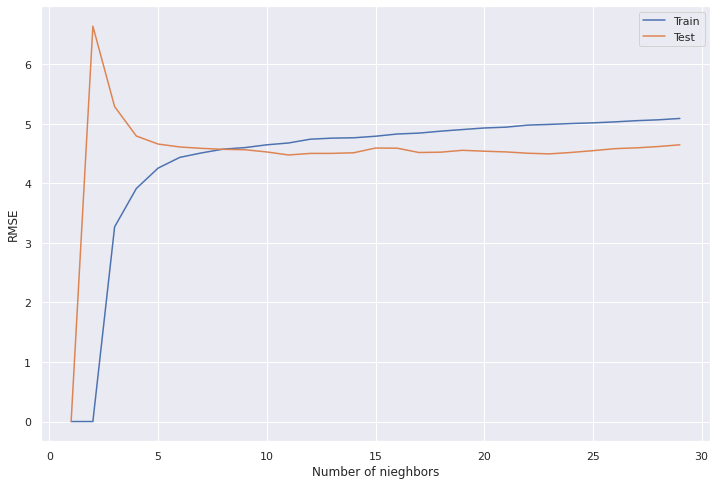

In [ ]:
NumNeighbors =range(1,30)
vRmse = np.zeros(len(NumNeighbors)) # create array of zeros
vRmsetest = np.zeros(len(NumNeighbors)) # create array of zeros

for i in range(1,len(NumNeighbors)):
  Vmodel = KNeighborsRegressor(n_neighbors=i,p=1).fit(X_t_train, y_train) 
  vRmse[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_t_train), y_train)) 
  vRmsetest[i] = np.sqrt(mean_squared_error(Vmodel.predict(X_t_test), y_test))

hF , hA = plt.subplots(figsize=(12,8))
hA.plot(NumNeighbors,vRmse,label='Train')
hA.plot(NumNeighbors,vRmsetest,label='Test')
hA.set_xlabel('Number of nieghbors')
hA.set_ylabel('RMSE')
hA.legend()

# Comparing Methods

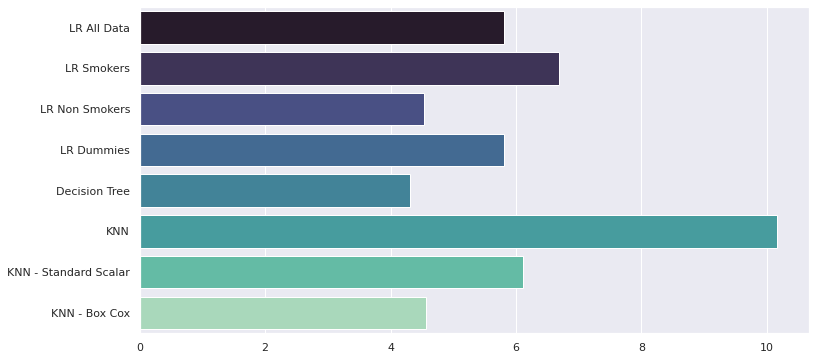

In [ ]:
accuracy_scores = [df_LR_test_rmse, smoker_LR_test_rmse, NonSmoker_LR_test_rmse, 
                   df_LR_dum_test_rmse, DT_test_rmse, df_rmse_test_knn, df_s_rmse_test_knn, 
                   df_t_rmse_test_knn]
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores)
model_names = ['LR All Data', 'LR Smokers','LR Non Smokers','LR Dummies',
               'Decision Tree', 'KNN', 'KNN - Standard Scalar', 'KNN - Box Cox']
sns.barplot(x=model_accuracies, y=model_names, palette='mako');